In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df=pd.read_csv('data/mushrooms.csv')

In [3]:
# 3. Importing and copying
# Disclaimer: Due to the large amount of attributes I will only pick a few. Nevertheless I will import all of them. 

column_names = [
    "edible",                  # 0: edible=e, poisonous=p
    "cap_shape",               # 1: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    "cap_surface",             # 2: fibrous=f, grooves=g, scaly=y, smooth=s
    "cap_color",               # 3: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    "bruises",                 # 4: bruises=t, no=f
    "odor",                    # 5: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    "gill_attachment",         # 6: attached=a, descending=d, free=f, notched=n
    "gill_spacing",            # 7: close=c, crowded=w, distant=d
    "gill_size",               # 8: broad=b, narrow=n
    "gill_color",              # 9: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    "stalk_shape",             # 10: enlarging=e, tapering=t
    "stalk_root",              # 11: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    "stalk_surface_above_ring",# 12: fibrous=f, scaly=y, silky=k, smooth=s
    "stalk_surface_below_ring",# 13: fibrous=f, scaly=y, silky=k, smooth=s
    "stalk_color_above_ring",  # 14: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    "stalk_color_below_ring",  # 15: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    "veil_type",               # 16: partial=p, universal=u
    "veil_color",              # 17: brown=n, orange=o, white=w, yellow=y
    "ring_number",             # 18: none=n, one=o, two=t
    "ring_type",               # 19: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    "spore_print_color",       # 20: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    "population",              # 21: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    "habitat"                  # 22: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d
]

df = pd.read_csv('data/mushrooms.csv', # auf unseren Pfad angepasst
                 names=column_names, 
                )

#df = pd.read_csv('data/mushroom/agaricus-lepiota.data', 
#                 names=column_names, 
#               )

data = df.copy()

In [4]:
# 4. .head() and other functions - Es ist egal ob head oder tail in dem Datensatz
data.head()
data.tail()
data.sample()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
5308,p,x,s,g,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,v,u


In [5]:
# 5. Printing the data set information
#data.info() # the output "non-null count" is not truthful, as the dataset already compensates missing entries for the attribute "stalk-root" with "?"

# creating NaN entries:
count=(data.iloc[:, 11] =='?').sum()
data.iloc[:,11] = data.iloc[:,11].replace("?", np.nan) # replaces every "?" in column 11 (stalk-root) with "NaN" from numpy.
data.info() # Now column 11 shows less than 8124 Non-Null entries.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8125 non-null   object
 1   cap_shape                 8125 non-null   object
 2   cap_surface               8125 non-null   object
 3   cap_color                 8125 non-null   object
 4   bruises                   8125 non-null   object
 5   odor                      8125 non-null   object
 6   gill_attachment           8125 non-null   object
 7   gill_spacing              8125 non-null   object
 8   gill_size                 8125 non-null   object
 9   gill_color                8125 non-null   object
 10  stalk_shape               8125 non-null   object
 11  stalk_root                5645 non-null   object
 12  stalk_surface_above_ring  8125 non-null   object
 13  stalk_surface_below_ring  8125 non-null   object
 14  stalk_color_above_ring  

In [6]:
# 6. Statistical description
data.iloc[:,1:].describe()

# unique zählt die die Überschrift mit, deswegebn 3 bei eddible

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8125,8125,8125,8125,8125,8125,8125,8125,8125,8125,...,8125,8125,8125,8125,8125,8125,8125,8125,8125,8125
unique,7,5,11,3,10,3,3,3,13,3,...,5,10,10,2,5,4,6,10,7,8
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
labeled_data = data.copy() 

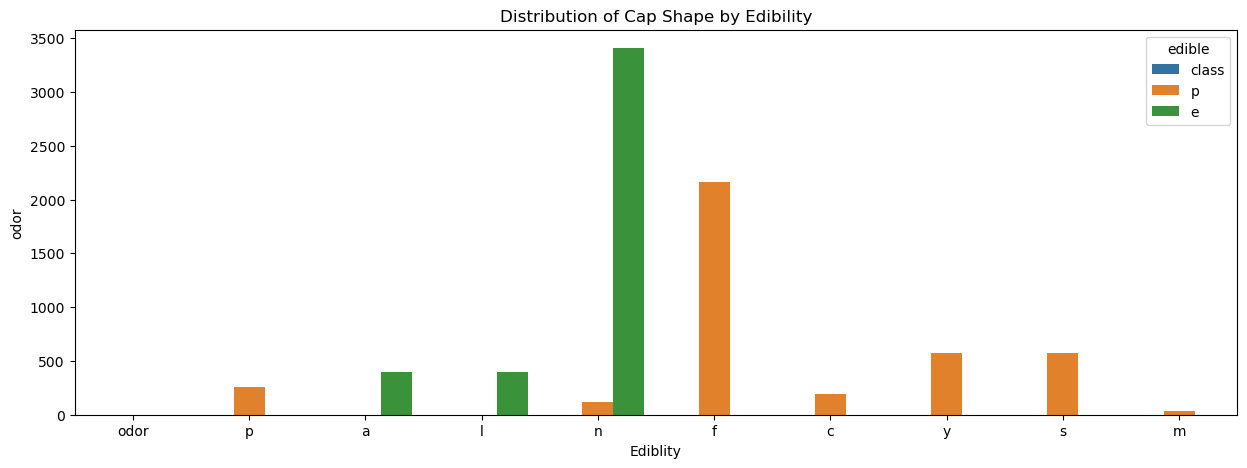

In [8]:
sns.countplot(x='odor', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('odor')
plt.show()

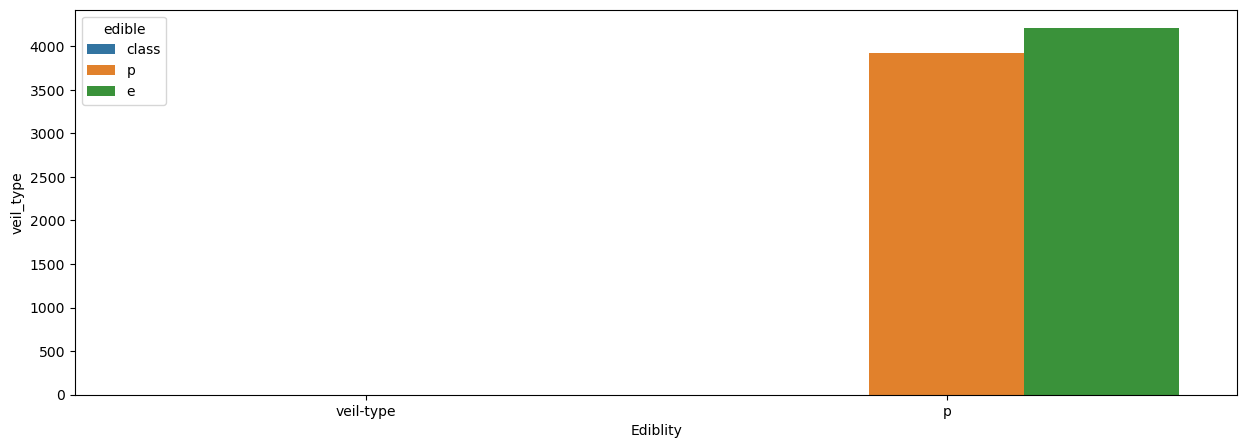

In [9]:
sns.countplot(x='veil_type', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('veil_type')
plt.show()

In [10]:
frequency_counts = df["veil_type"].value_counts()

print(frequency_counts)

veil_type
p            8124
veil-type       1
Name: count, dtype: int64


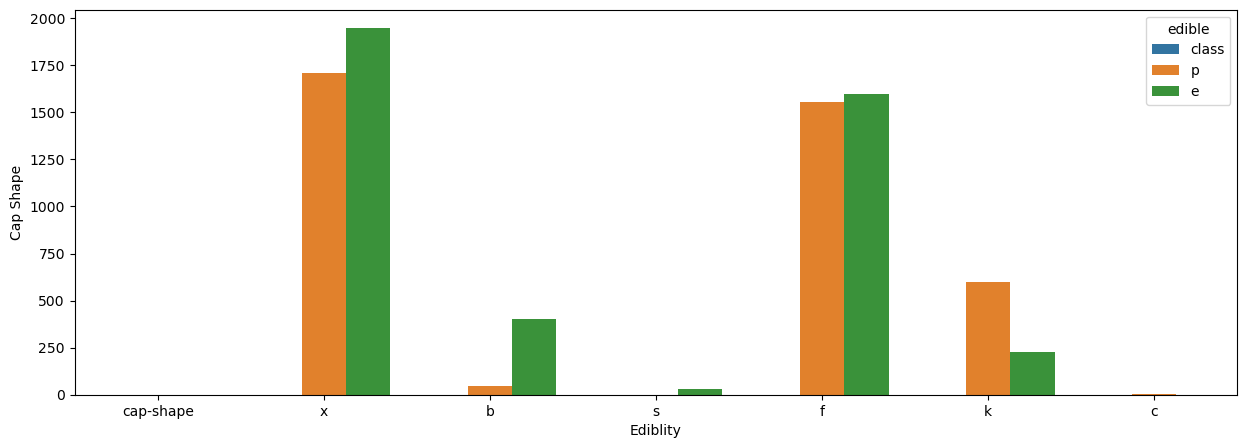

In [11]:
sns.countplot(x='cap_shape', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('Cap Shape')
plt.show()

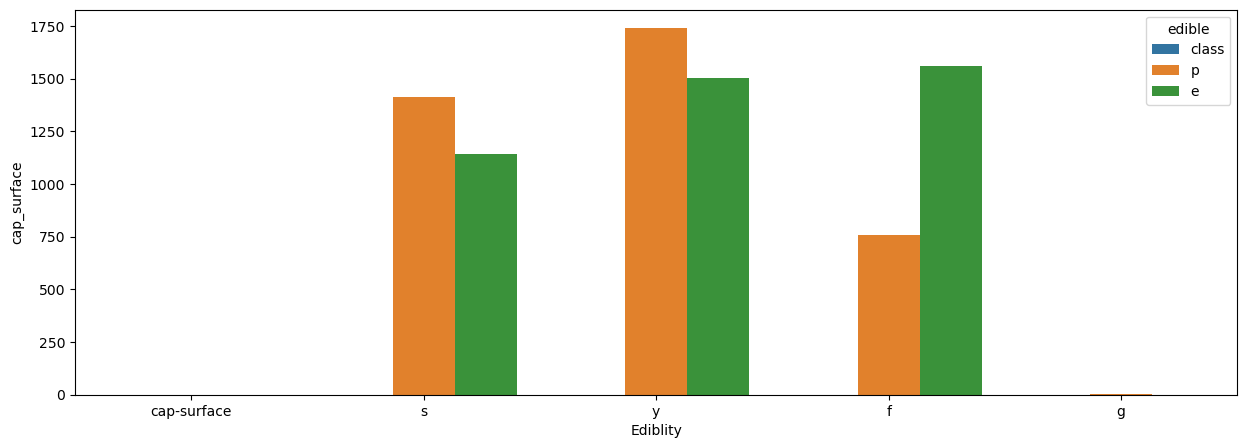

In [12]:
sns.countplot(x='cap_surface', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('cap_surface')
plt.show()

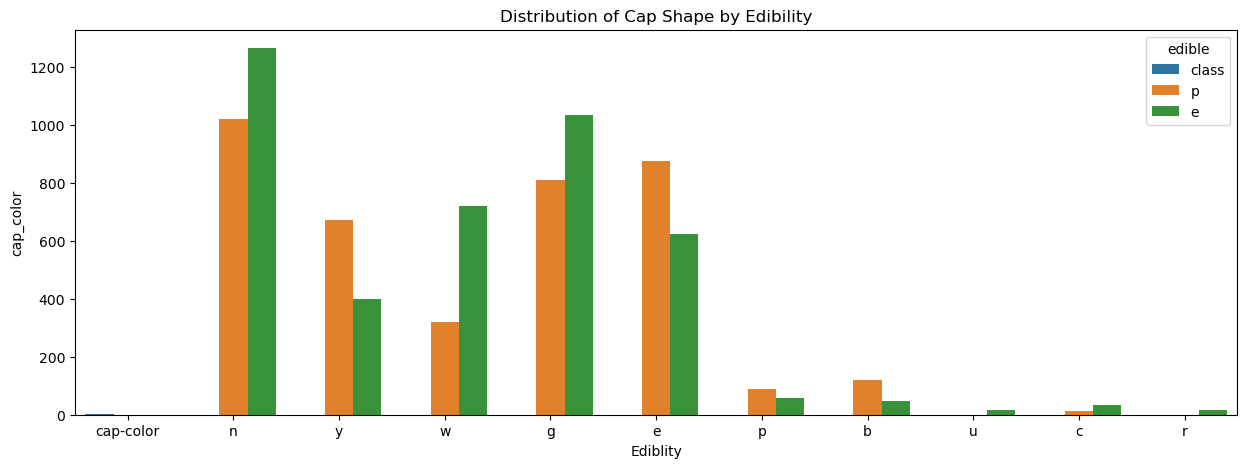

In [13]:
sns.countplot(x='cap_color', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('cap_color')
plt.show()

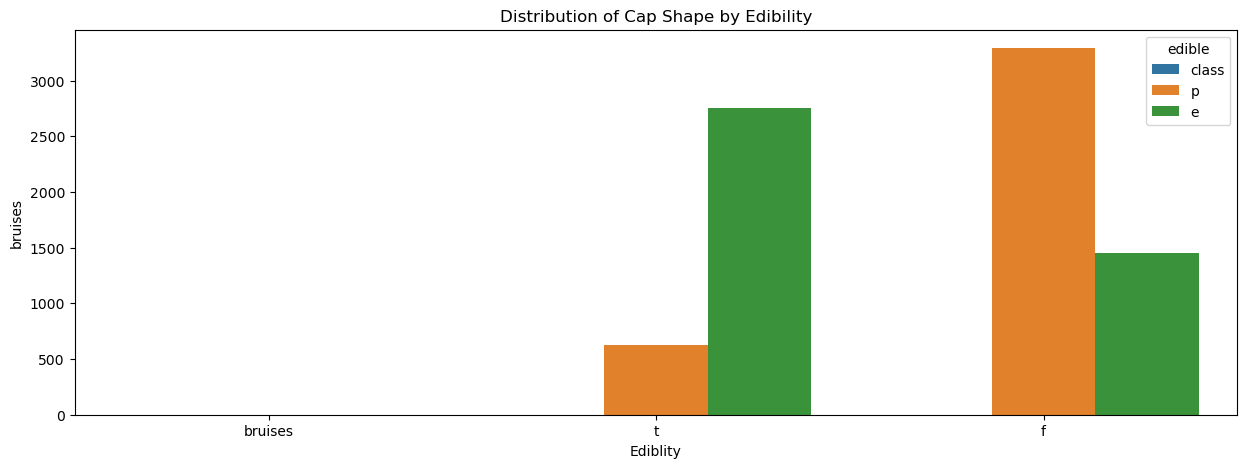

In [14]:
sns.countplot(x='bruises', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('bruises')
plt.show()

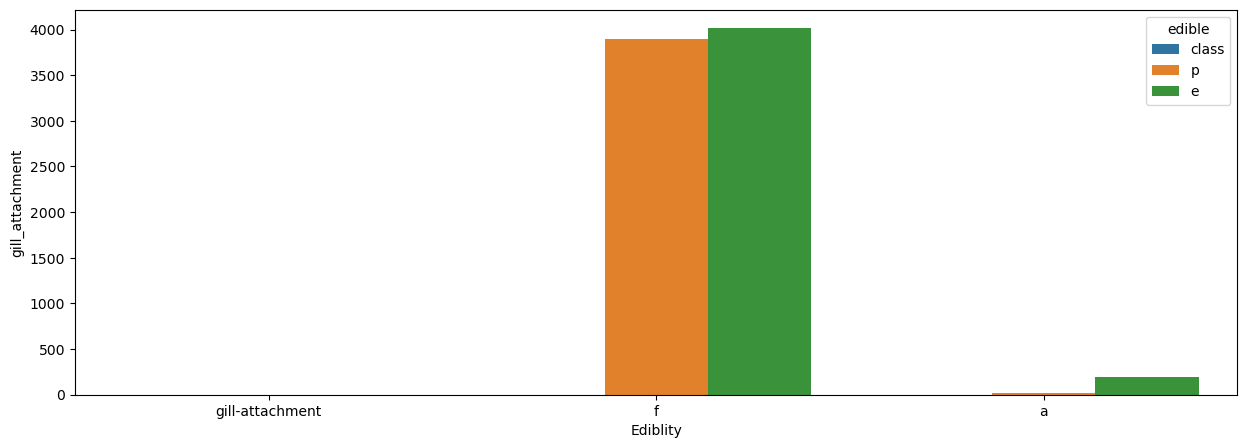

In [15]:
sns.countplot(x='gill_attachment', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('gill_attachment')
plt.show()

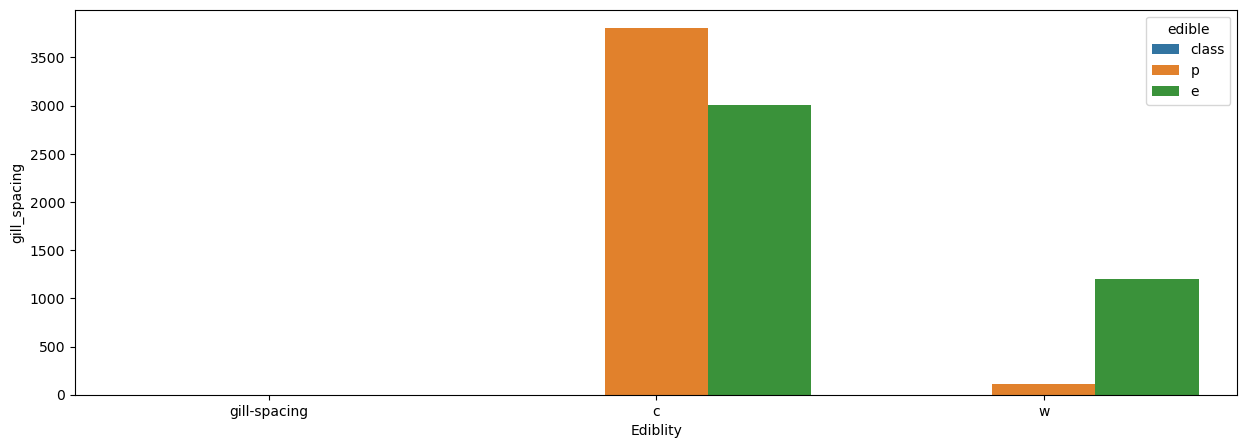

In [16]:
sns.countplot(x='gill_spacing', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('gill_spacing')
plt.show()

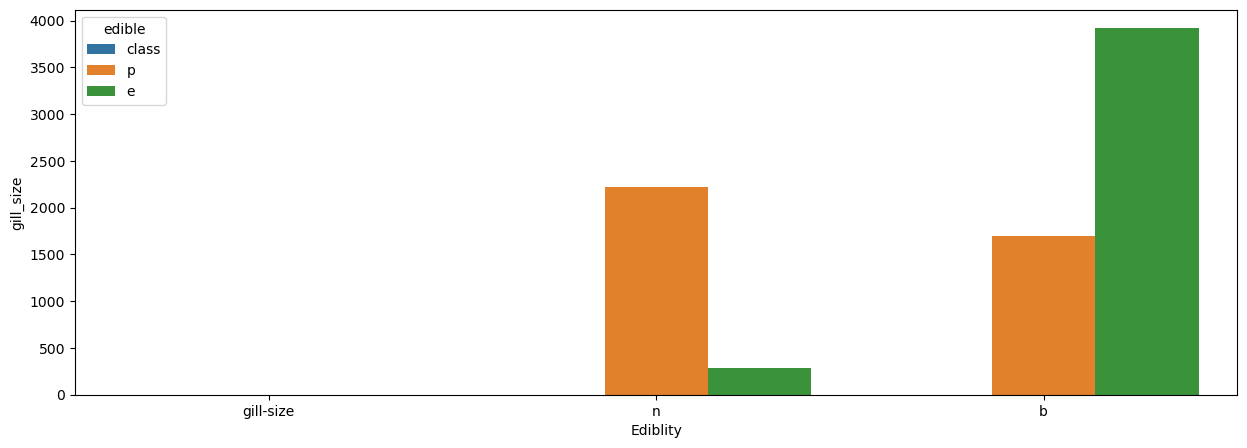

In [17]:
sns.countplot(x='gill_size', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('gill_size')
plt.show()

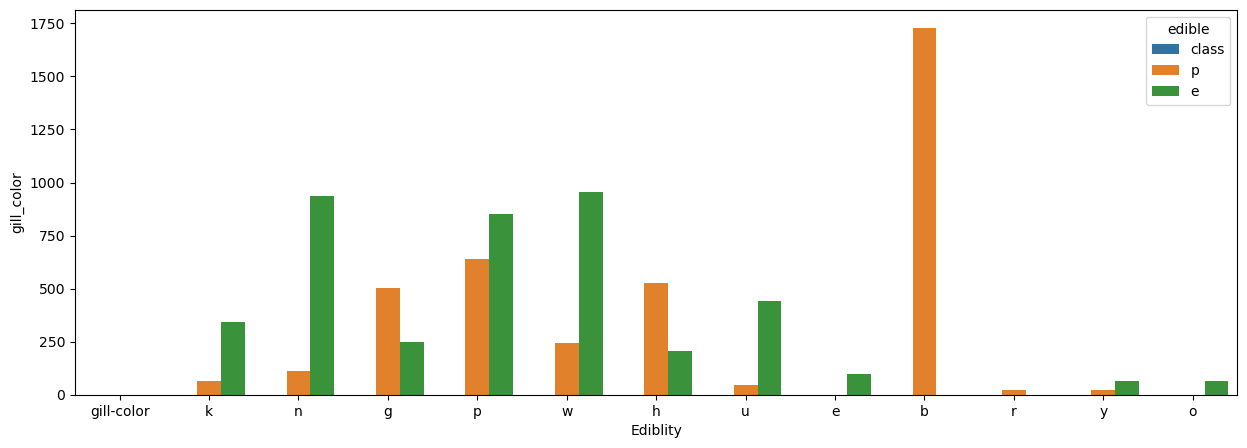

In [18]:
sns.countplot(x='gill_color', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('gill_color')
plt.show()

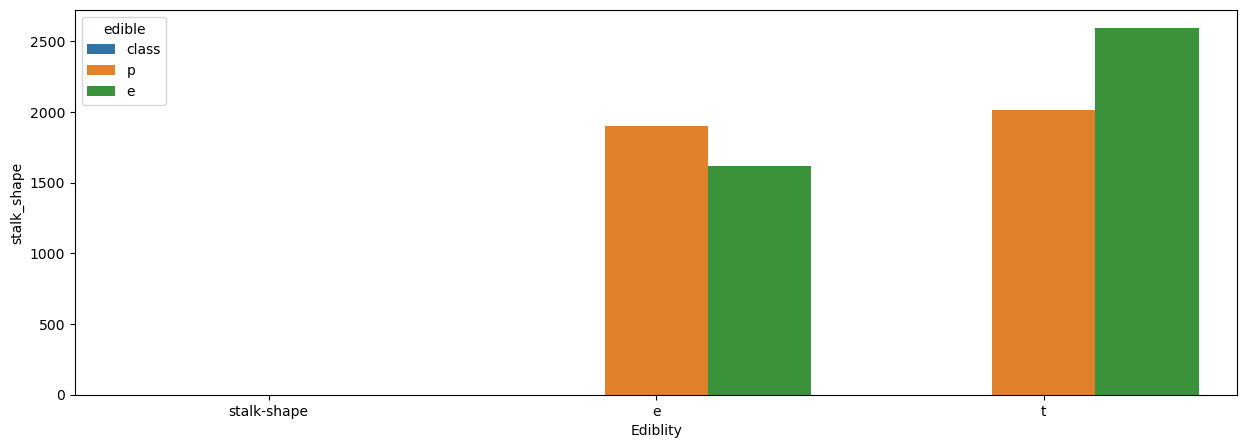

In [19]:
sns.countplot(x='stalk_shape', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_shape')
plt.show()

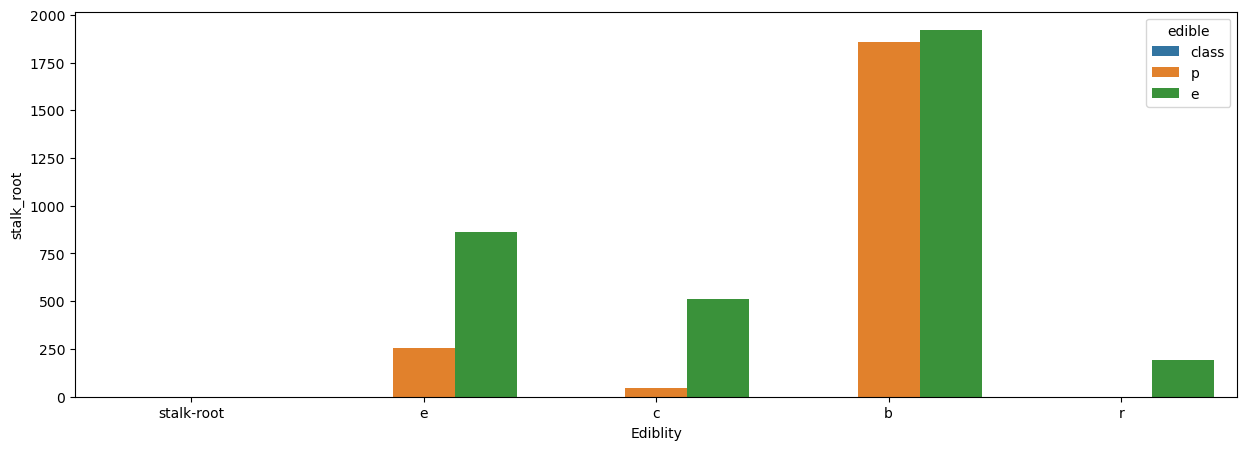

In [20]:
sns.countplot(x='stalk_root', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_root')
plt.show()

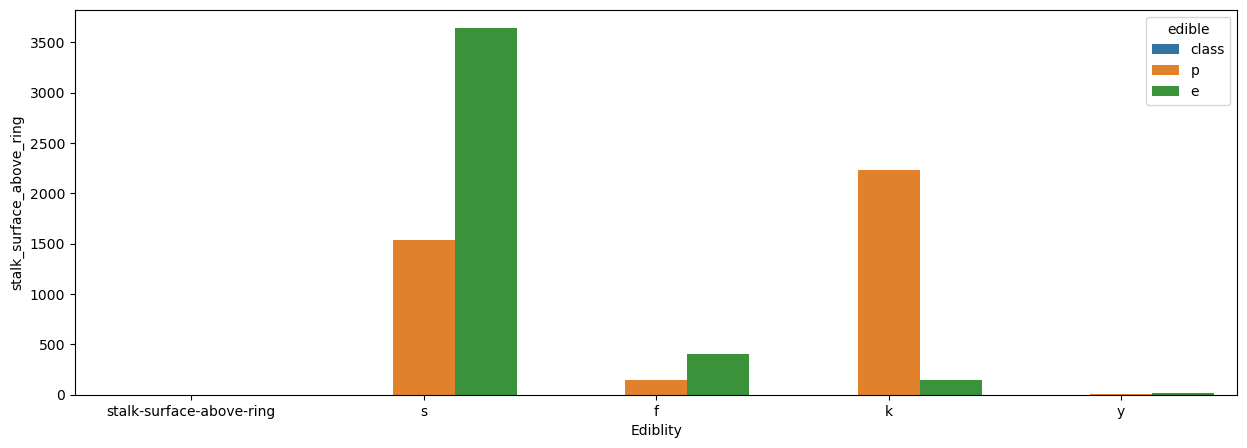

In [21]:
sns.countplot(x='stalk_surface_above_ring', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_surface_above_ring')
plt.show()

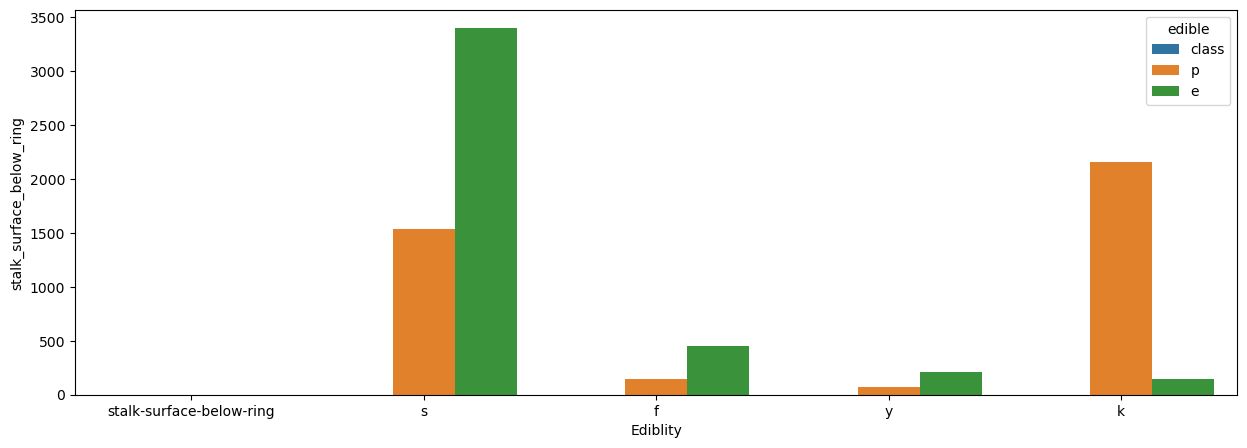

In [22]:
sns.countplot(x='stalk_surface_below_ring', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_surface_below_ring')
plt.show()

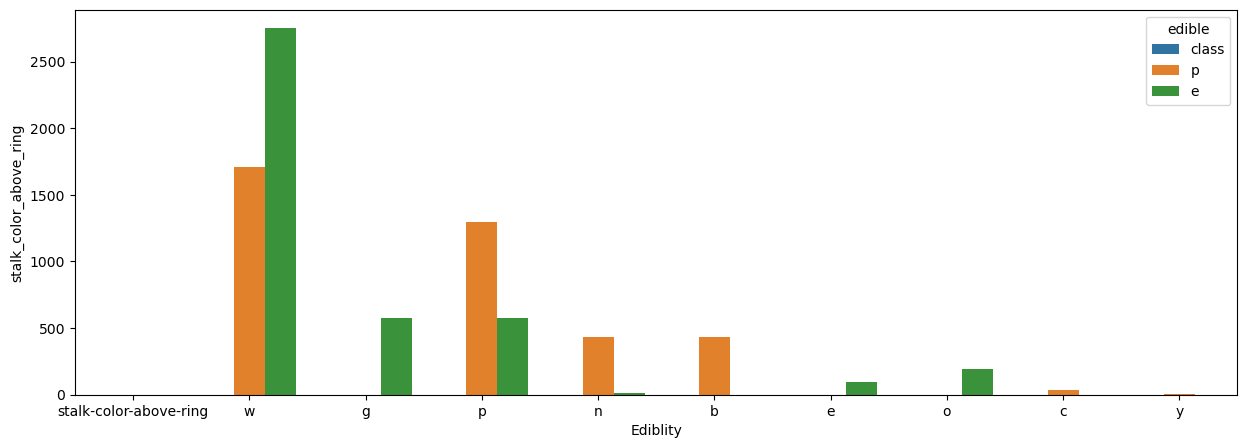

In [23]:
sns.countplot(x='stalk_color_above_ring', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_color_above_ring')
plt.show()

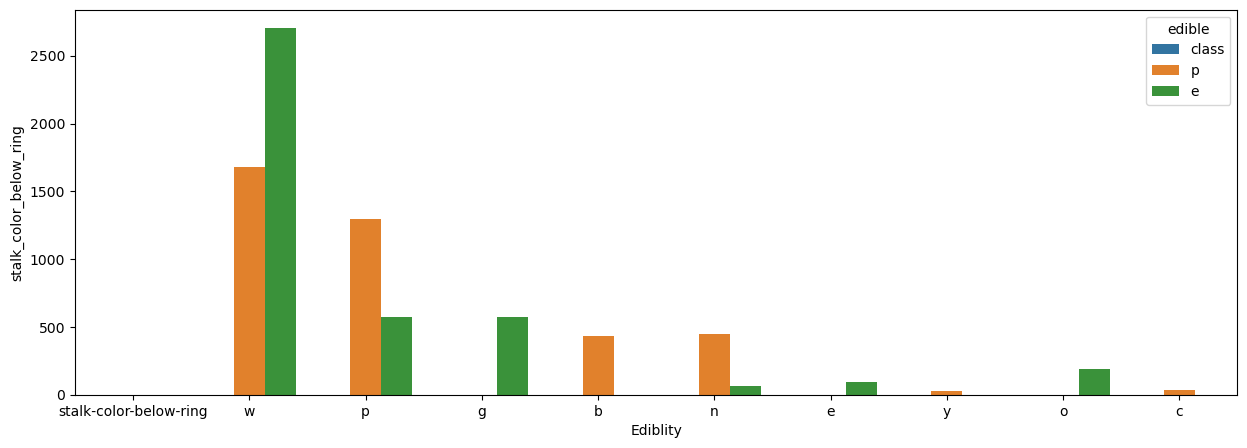

In [24]:
sns.countplot(x='stalk_color_below_ring', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('stalk_color_below_ring')
plt.show()

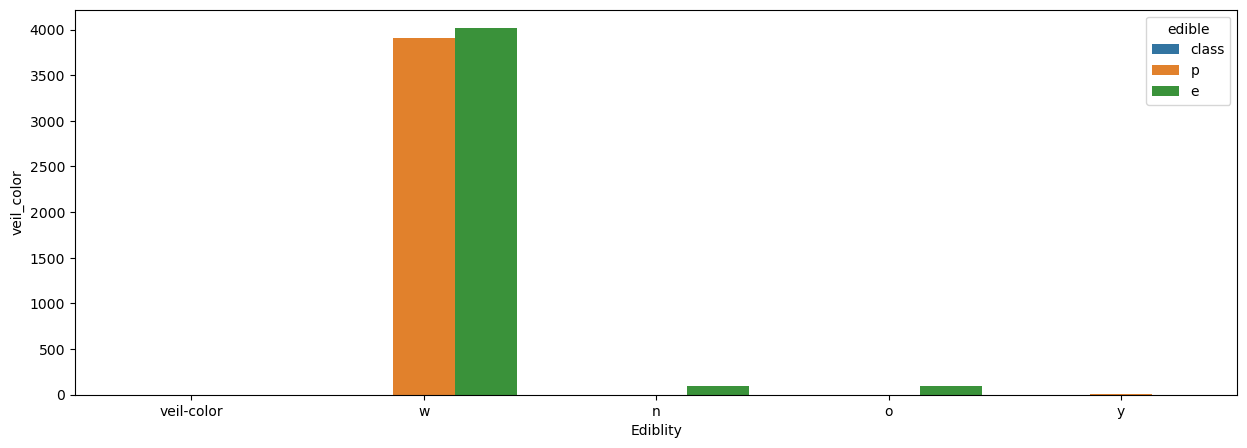

In [25]:
sns.countplot(x='veil_color', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('veil_color')
plt.show()

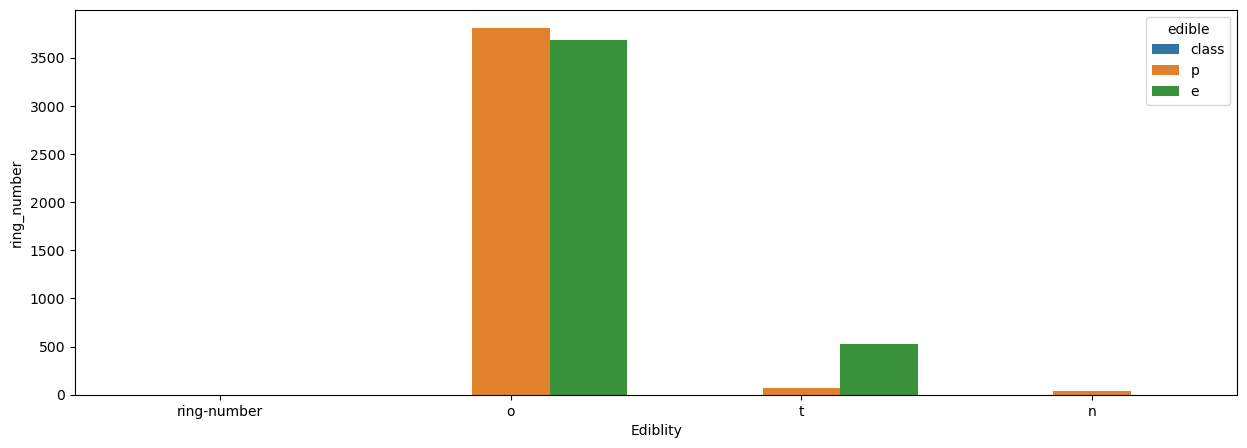

In [26]:
sns.countplot(x='ring_number', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('ring_number')
plt.show()

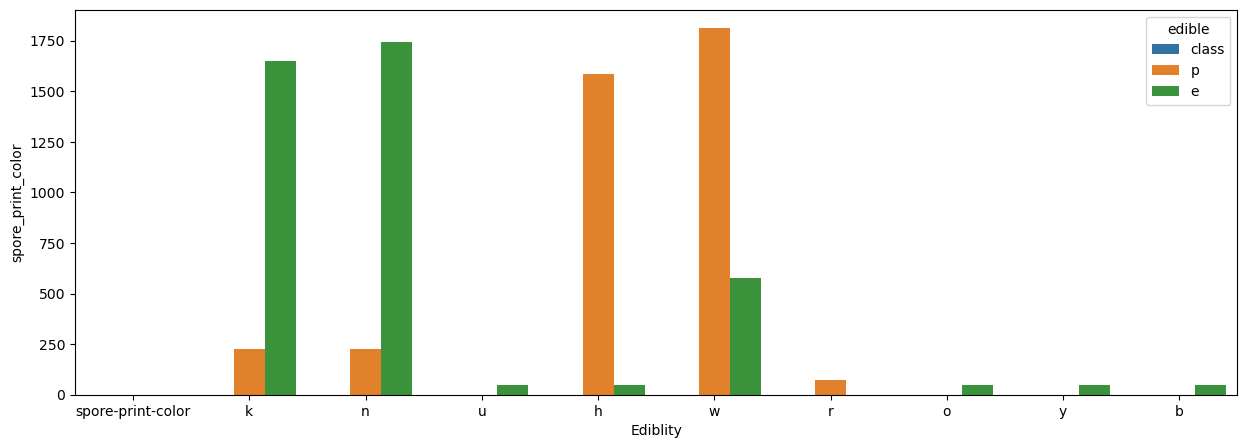

In [27]:
sns.countplot(x='spore_print_color', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('spore_print_color')
plt.show()

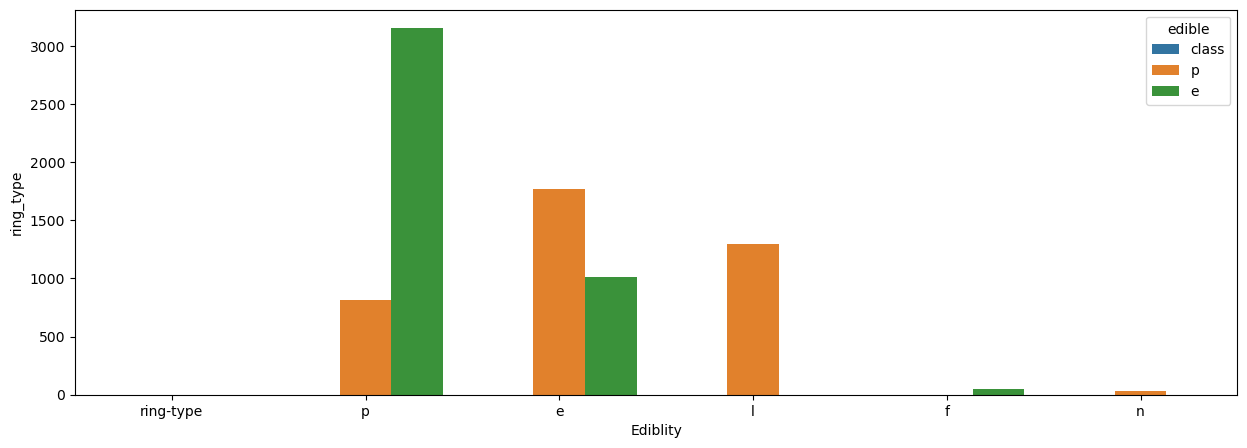

In [28]:
sns.countplot(x='ring_type', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('ring_type')
plt.show()

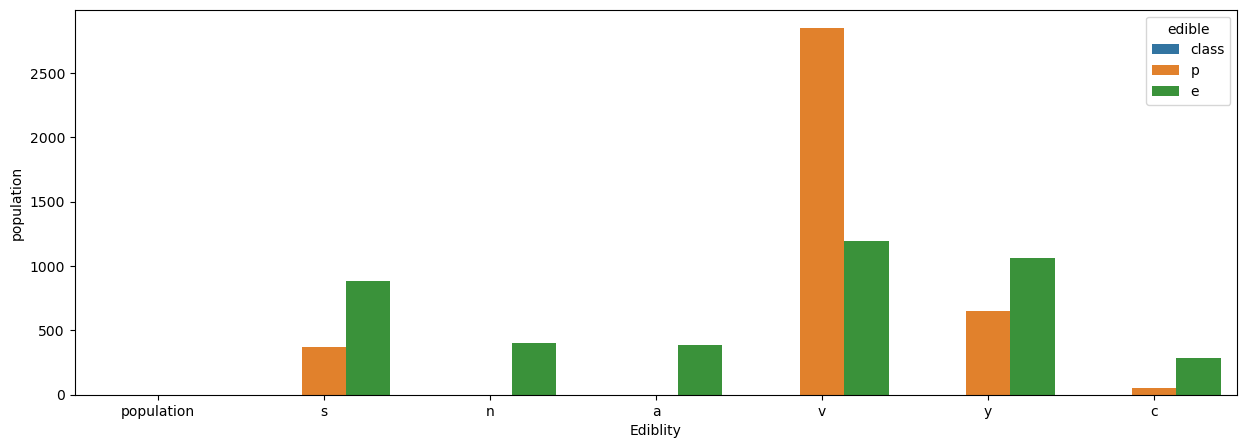

In [29]:
sns.countplot(x='population', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('population')
plt.show()

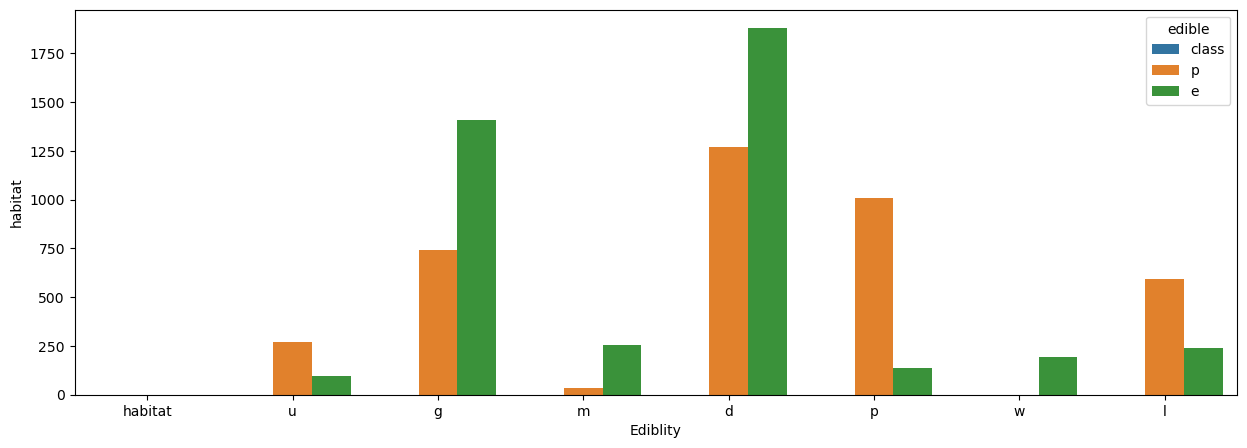

In [30]:
sns.countplot(x='habitat', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('Ediblity')
plt.ylabel('habitat')
plt.show()

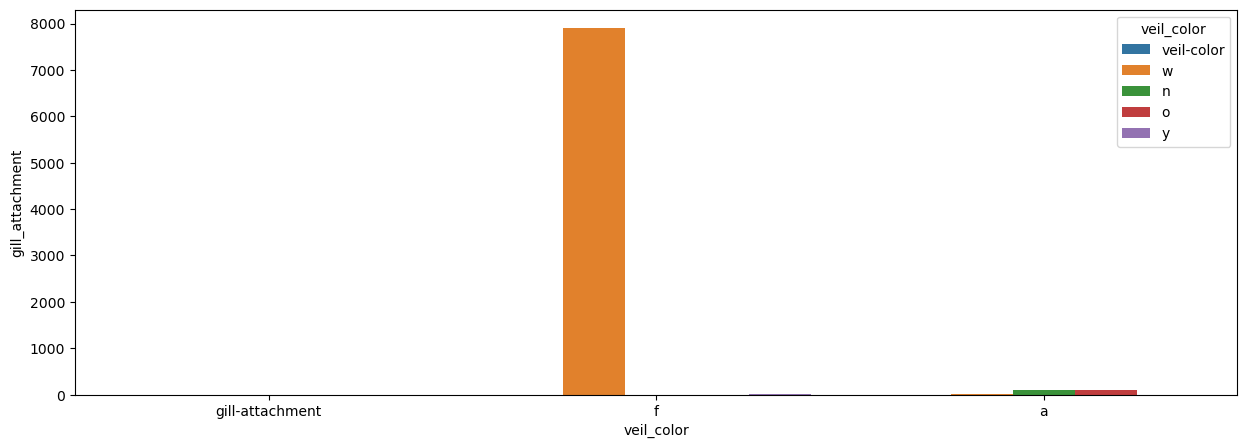

In [31]:
sns.countplot(x='gill_attachment', hue='veil_color', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.xlabel('veil_color')
plt.ylabel('gill_attachment')
plt.show()